Epoch 1/30
313/313 [==============================] - 3s 3ms/step - loss: 0.5358 - accuracy: 0.6997
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.2272 - accuracy: 0.9591
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1204 - accuracy: 0.9798
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9865
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9885
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0589 - accuracy: 0.9902
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9907
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9918
Epoch 9/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9918
Epoch 10/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9908

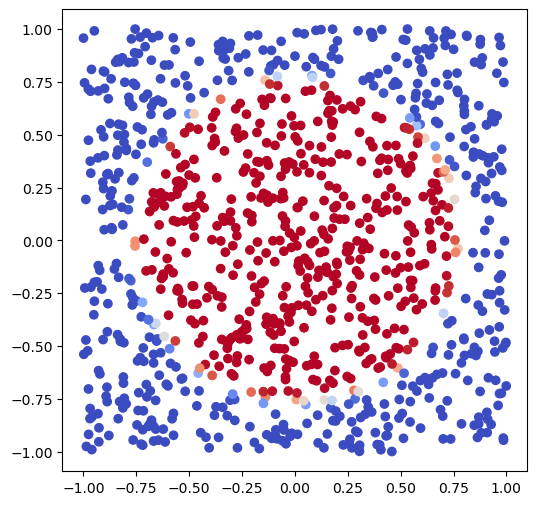

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Define the art neural network model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Generate training data
X = np.random.rand(10000, 2) * 2 - 1
Y = np.zeros((10000, 1))
for i in range(10000):
    if X[i,0] ** 2 + X[i,1] ** 2 < 0.6:
        Y[i,0] = 1

# Train the model
model.fit(X, Y, epochs=30, batch_size=32)

# Generate test data
X_test = np.random.rand(1000, 2) * 2 - 1
Y_test = model.predict(X_test)

# Plot the results
plt.figure(figsize=(6,6))
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test[:,0], cmap='coolwarm')
plt.axis('equal')
plt.show()


In [4]:
import numpy as np

class ARTNeuralNetwork:
    def __init__(self, input_dim, vigilance):
        self.input_dim = input_dim
        self.vigilance = vigilance
        self.weights = np.random.rand(input_dim)
        
    def normalize_input(self, x):
        norm_x = np.linalg.norm(x)
        return x / norm_x if norm_x > 0 else x
    
    def match(self, x):
        return np.sum(np.minimum(self.normalize_input(x), self.weights)) / np.sum(self.normalize_input(x))
    
    def train(self, X):
        for x in X:
            if self.match(x) < self.vigilance:
                self.weights = np.maximum(self.weights, self.normalize_input(x))
    
    def classify(self, x):
        return 1 if self.match(x) >= self.vigilance else 0

# Example usage
X = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 0], [0, 0, 1]])
vigilance = 0.9

# Create and train the ART neural network
art_nn = ARTNeuralNetwork(input_dim=X.shape[1], vigilance=vigilance)
art_nn.train(X)

# Test the ART neural network
test_data = np.array([[1, 0, 1], [0, 1, 0]])
for x in test_data:
    classification = "recognized" if art_nn.classify(x) == 1 else "is novel"
    print(f"Pattern {x} {classification}")

Pattern [1 0 1] recognized
Pattern [0 1 0] is novel
